In [9]:
import numpy as np
import matplotlib.pyplot as plt
import logging 

def get_kl(file_name = './ckpt/ec/ec_3type_KD.log'):

    start = 4

    with open(file_name, 'r') as f:
        lines = f.readlines()

    lines = lines[:-3]
    loss_kls = []
    i = 0  
    for line in lines:
        if i < start:
            i += 1
            continue
        else:
            if i % 2 == 1:
                line = line.rstrip()
                losses = line.split(',')
                for loss in losses:
                    name, value = loss.split(':')
                    if name == ' loss_kl':
                        loss_kls.append(float(value))
                        # print(float(value))
                i += 1
            else:
                i += 1
                continue
    return loss_kls

# fold_3type_KD = get_kl(file_name='ckpt/fold/fold_3type_KD.log')
# fold_teacher_no_KD = get_kl(file_name='ckpt/fold/fold_teacher_no_KD.log')
ec_3type_KD = get_kl(file_name='./ckpt/ec/ec_3type_KD.log')
ec_teacher_no_KD = get_kl(file_name='./ckpt/ec/ec_3type_no_KD.log')
# print(ec_3type_KD)

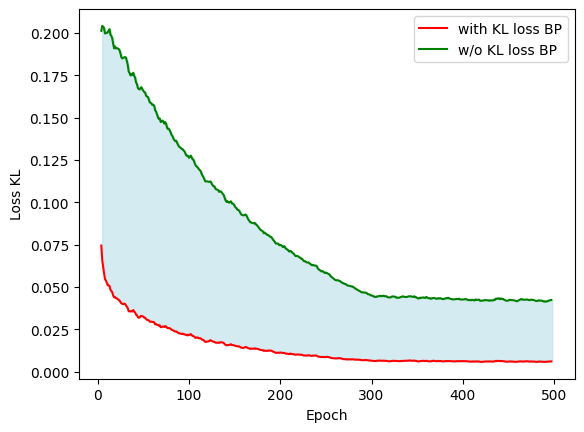

In [11]:
import pandas as pd

def moving_average(data, window_size):
    return pd.Series(data).rolling(window=window_size).mean().tolist()
fold_3type_KD_smoothed = moving_average(ec_3type_KD, window_size=5)
fold_teacher_no_KD_smoothed = moving_average(ec_teacher_no_KD, window_size=5)
plt.plot(fold_3type_KD_smoothed, label='with KL loss BP', color='red')
plt.plot(fold_teacher_no_KD_smoothed, label='w/o KL loss BP', color='green')
condition = pd.Series(dtype=float)
condition = np.array(fold_3type_KD_smoothed) < np.array(fold_teacher_no_KD_smoothed)
x = range(1, len(ec_3type_KD) + 1)
plt.fill_between(x, fold_teacher_no_KD_smoothed, fold_3type_KD_smoothed, where=condition,
                 interpolate=True, color='lightblue', alpha=0.5)
plt.xlabel('Epoch')
plt.ylabel('Loss KL')
plt.legend()

# plt.plot(ec_3type_KD, label='with KL loss BP', color='red', linestyle='-', marker='o')
# plt.plot(ec_teacher_no_KD, label='w/o KL loss BP', color='green', linestyle='-', marker='o')
# plt.xlabel('Epoch')  
# plt.ylabel('Loss KL')
# plt.legend()